# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

## I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
# Import das bibliotecas
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

#carregando os dados
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [2]:
# 1.Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill
y, x = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

In [3]:
reg = smf.ols('tip ~ sex + smoker + time + net_bill', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.64e-20
Time:                        18:03:53   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Depois de analisarmos o P>|t| (valor-p), verificamos que há variáveis que podemos desconsiderar, pois estão altas e são estatisticamente insignificantes para nós.

In [4]:
# 2.Remova as variáveis não significantes.
reg_limpo = smf.ols('tip ~  smoker + net_bill', data = tips).fit()
tips['res_log'] = reg_limpo.resid

reg_limpo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           4.56e-22
Time:                        18:03:53   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

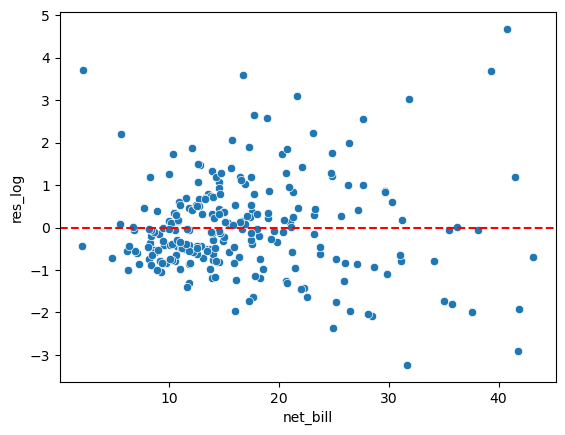

In [5]:
# 3. observe o gráfico de resíduos em função de ```net_bill```  
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [6]:
# 4. teste transformar ```net_bill``` no log.
reg_log= smf.ols('tip ~  smoker + np.log(net_bill)', data = tips).fit()
tips['res_log'] = reg_log.resid

reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           5.38e-19
Time:                        18:03:53   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

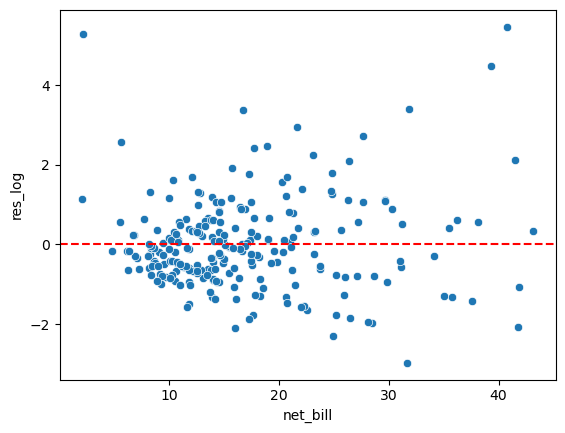

In [7]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [8]:
# teste transformar ```net_bill``` num polinômio.
reg_pol = smf.ols('tip ~  smoker + np.power(net_bill,2)', data = tips).fit()
tips['res_log'] = reg_pol.resid

reg_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.04e-19
Time:                        18:03:54   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

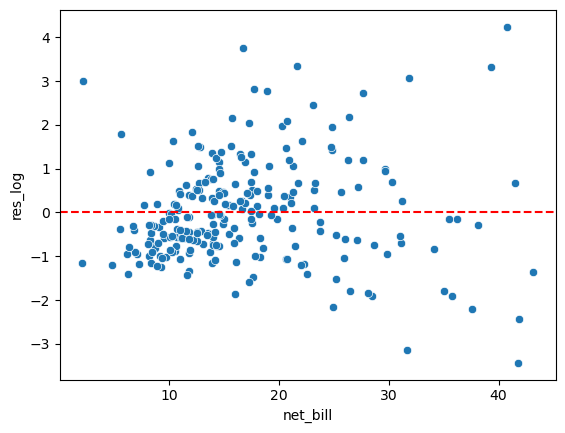

In [9]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo:
Após analisarmos os dois modelos, eu escolho o modelo com polinômio, pois o coeficiente de determinação (R-quadrado) apresentado é maior

## II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
# Crie a matriz de design (e a matriz y) utilizando o Patsy, log de tip, explicado por sex, smoker, diner e net_bill
y, x = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

In [11]:
# Modelo no log de tip, explicado por sex, smoker, diner e net_bill.
reg1 = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', data = tips).fit()
tips['res_log'] = reg1.resid

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.21e-18
Time:                        18:03:54   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Seguindo o mesmo padrão de analise, removemos as variáveis com os maiores P>|t| (valor-p). Pois são estatisticamente insignificantes para nós.

In [12]:
# Remova as variáveis não significantes
reg1_limpo = smf.ols('np.log(tip) ~ smoker + net_bill', data = tips).fit()
tips['res_log'] = reg1_limpo.resid

reg1_limpo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.31e-20
Time:                        18:03:54   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

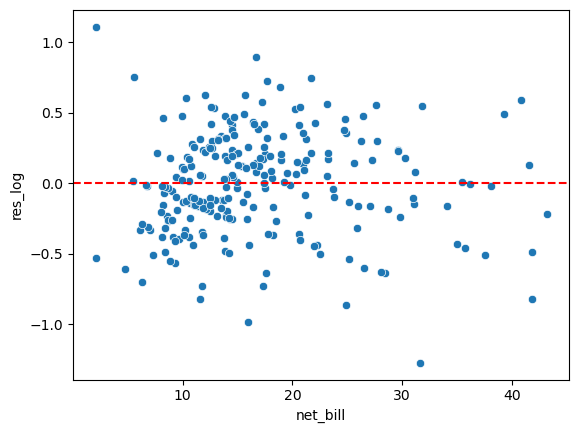

In [13]:
# Observe o gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [14]:
# Teste transformar net_bill no log. 
reg1_log = smf.ols('np.log(tip) ~ smoker + np.log(net_bill)', data = tips).fit()
tips['res_log'] = reg1_log.resid

reg1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           7.20e-21
Time:                        18:03:54   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138     -2.941      0.004      -0.677      -0.134
smoker[T.No]         0.0153      0.048      0.322      0.748      -0.079       0.109
np.log(net_bill)     0.5157      0.048     10.636      0.000       0.420       0.611
==============================================================================
Omnibus:                       13.271   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.908
Skew:                           0.159   Prob(JB):                     3.20e-07
Kurtosis:                       4.685   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

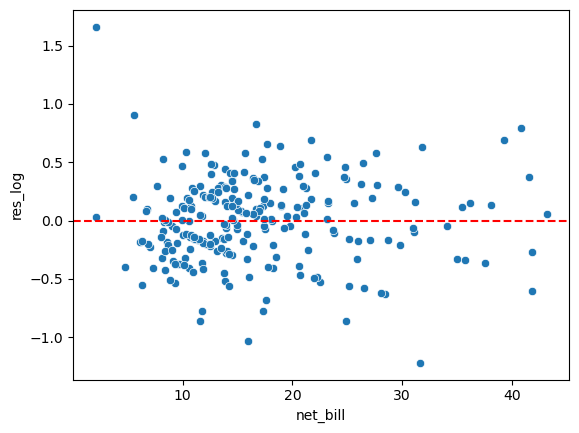

In [15]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [16]:
# Teste transformar net_bill no polinômio. 
reg1_pol = smf.ols('np.log(tip) ~ smoker + np.power(net_bill,2)', data = tips).fit()
tips['res_log'] = reg1_pol.resid

reg1_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.81
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           5.45e-16
Time:                        18:03:55   Log-Likelihood:                -107.68
No. Observations:                 244   AIC:                             221.4
Df Residuals:                     241   BIC:                             231.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7562      0.048     15.764      0.000       0.662       0.851
smoker[T.No]              0.0492      0.050      0.978      0.329      -0.050       0.148
np.power(net_bill, 2)     0.0006   6.91e-05      9.034      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.759   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.801
Skew:                          -0.202   Prob(JB):                        0.406
Kurtosis:                       2.880   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

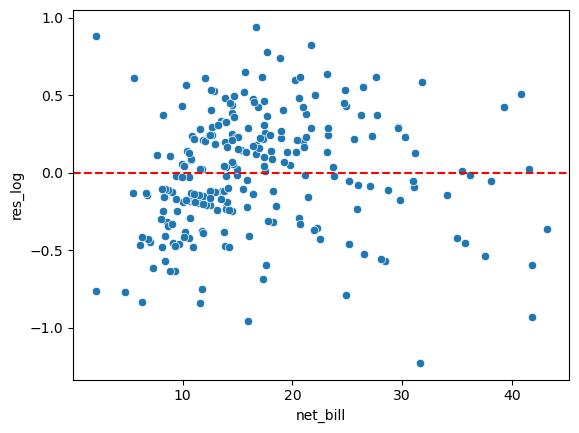

In [17]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### Escolha o melhor modelo de log de net_bill ou polinômio de net_bill:
Avaliandos os dois modelos, podemos concluir que o modelo de log é melhor em comparação com o de polinômio, com o coeficiente de determinação (r-quadrado) explicando cerca de 31%, do modelo contra 25%.

### Do modelo final deste item, calcule o  𝑅2 na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

O modelo final sem log em tip tem como coeficiente de determinação contra 


In [18]:
print(f'R2 Modelo do melhor modelo do item I: {reg_pol.rsquared * 100:.2f}%')
print(f'R2 Modelo do melhor modelo desse item: {reg1_log.rsquared * 100:.2f}%')
print(f'A comparação dos R2 dos modelos dos dois itens revelou que o log da variável "tip" e "net_bill" apresentou o melhor desempenho, com {reg1_log.rsquared * 100:.2f}% dos dados explicados. Contudo, esse valor ainda fica abaixo do R-quadrado da matriz de design inicial, que era de {reg.rsquared * 100:.2f}%')

R2 Modelo do melhor modelo do item I: 30.42%
R2 Modelo do melhor modelo desse item: 31.95%
A comparação dos R2 dos modelos dos dois itens revelou que o log da variável "tip" e "net_bill" apresentou o melhor desempenho, com 31.95% dos dados explicados. Contudo, esse valor ainda fica abaixo do R-quadrado da matriz de design inicial, que era de 33.52%


## III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [19]:
# Carregando dados
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [20]:
#limpeza de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [21]:
print(df.isna().sum()[df.isna().sum() != 0])

tempo_emprego    2573
dtype: int64


In [22]:
df = df.dropna()
df.isna().sum()

Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [23]:
#1. Ajuste um modelo de regressão linear simples para explicar 'renda' como variável resposta, por 'tempo_emprego' como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
reg_df = smf.ols('renda ~ tempo_emprego', df).fit()
df['res'] = reg_df.resid

reg_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:03:55   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

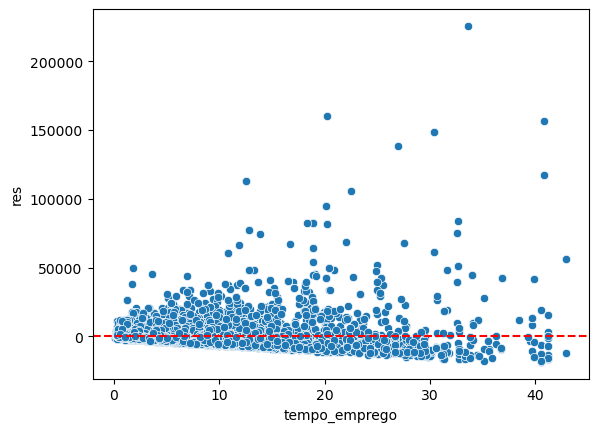

In [24]:
#2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

Eu testaria utilizar o poligomo e o log tanto paras as variáveis 

In [25]:
reg_log_df = smf.ols('renda ~ np.log(tempo_emprego)', df).fit()
df['res'] = reg_log_df.resid

reg_log_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1250.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          5.60e-261
Time:                        18:03:56   Log-Likelihood:            -1.3003e+05
No. Observations:               12427   AIC:                         2.601e+05
Df Residuals:                   12425   BIC:                         2.601e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1725.2452    145.623     11.847      0.000    1439.801    2010.689
np.log(tempo_emprego)  2682.8446     75.883     35.355      0.000    2534.102    2831.588
==============================================================================
Omnibus:                    17425.626   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8242940.092
Skew:                           8.068   Prob(JB):                         0.00
Kurtosis:                     128.136   Cond. No.                         4.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

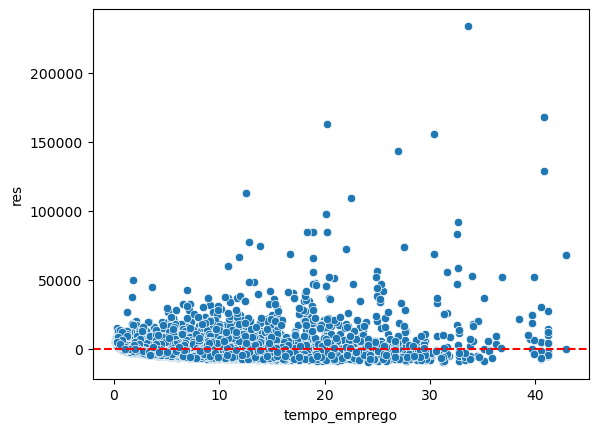

In [26]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [27]:
reg_power_df = smf.ols('renda ~ np.power(tempo_emprego,2)', df).fit()
df['res'] = reg_power_df.resid

reg_power_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2103.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:03:56   Log-Likelihood:            -1.2966e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4292.7789     83.791     51.232      0.000    4128.536    4457.022
np.power(tempo_emprego, 2)    17.4230      0.380     45.861      0.000      16.678      18.168
==============================================================================
Omnibus:                    16603.811   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6635416.263
Skew:                           7.384   Prob(JB):                         0.00
Kurtosis:                     115.235   Cond. No.                         251.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

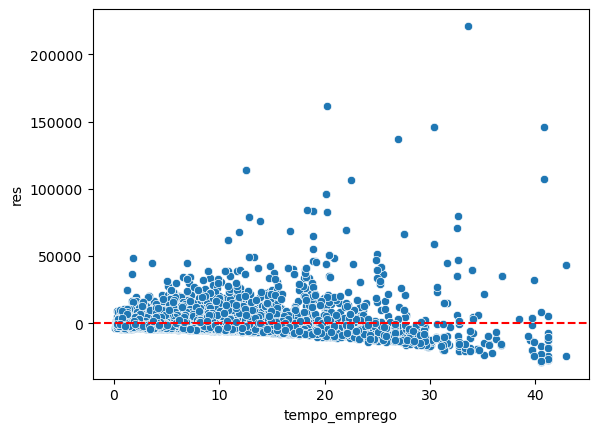

In [28]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [29]:
reg1_df = smf.ols('np.log(renda) ~ tempo_emprego', df).fit()
df['res'] = reg1_df.resid

reg1_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:03:57   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

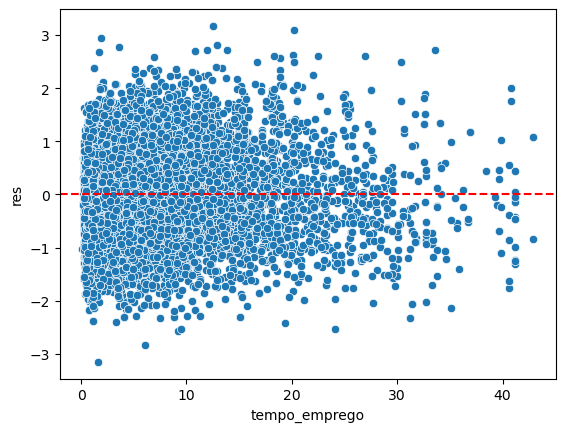

In [30]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [31]:
reg1_log_df = smf.ols('np.log(renda) ~ np.log(tempo_emprego)', df).fit()
df['res'] = reg1_log_df.resid

reg1_log_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2069.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:03:57   Log-Likelihood:                -15359.
No. Observations:               12427   AIC:                         3.072e+04
Df Residuals:                   12425   BIC:                         3.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.7112      0.014    538.819      0.000       7.683       7.739
np.log(tempo_emprego)     0.3392      0.007     45.490      0.000       0.325       0.354
==============================================================================
Omnibus:                       39.352   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.640
Skew:                           0.136   Prob(JB):                     2.47e-09
Kurtosis:                       3.049   Cond. No.                         4.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

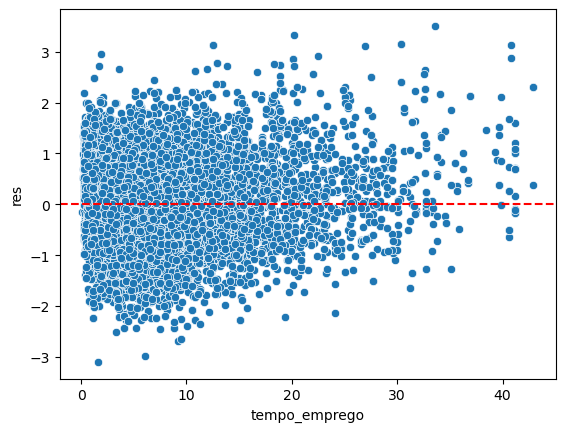

In [32]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [33]:
reg1_power_df = smf.ols('np.log(renda) ~ np.power(tempo_emprego,2)', df).fit()
df['res'] = reg1_power_df.resid

reg1_power_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     1860.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:03:58   Log-Likelihood:                -15450.
No. Observations:               12427   AIC:                         3.090e+04
Df Residuals:                   12425   BIC:                         3.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      8.0915      0.009    946.400      0.000       8.075       8.108
np.power(tempo_emprego, 2)     0.0017   3.88e-05     43.123      0.000       0.002       0.002
==============================================================================
Omnibus:                       59.995   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.750
Skew:                           0.169   Prob(JB):                     6.43e-14
Kurtosis:                       3.057   Cond. No.                         251.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

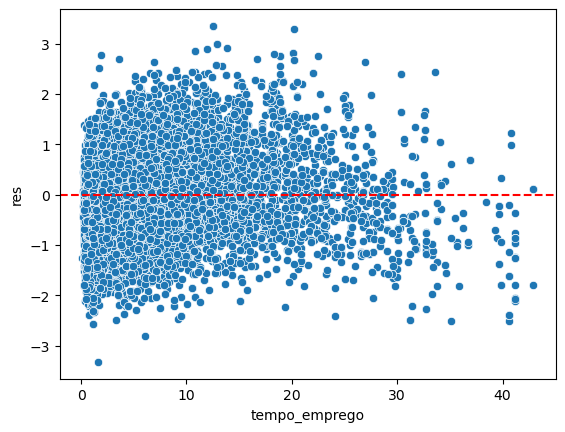

In [34]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [35]:
print(f'Após analisarmos todos os resultados possíveis, o modelo que apresentou o coeficiente de confiança mais alto foi o com polinômio da variável tempo de emprego, com um valor de {reg_power_df.rsquared*100:.2f}%.')

Após analisarmos todos os resultados possíveis, o modelo que apresentou o coeficiente de confiança mais alto foi o com polinômio da variável tempo de emprego, com um valor de 14.48%.


In [36]:
#3. Ajuste um modelo de regressão linear múltipla para explicar 'renda' (ou uma transformação de 'renda') de acordo com as demais variáveis.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12427 non-null  int64  
 1   data_ref               12427 non-null  object 
 2   id_cliente             12427 non-null  int64  
 3   sexo                   12427 non-null  object 
 4   posse_de_veiculo       12427 non-null  bool   
 5   posse_de_imovel        12427 non-null  bool   
 6   qtd_filhos             12427 non-null  int64  
 7   tipo_renda             12427 non-null  object 
 8   educacao               12427 non-null  object 
 9   estado_civil           12427 non-null  object 
 10  tipo_residencia        12427 non-null  object 
 11  idade                  12427 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  12427 non-null  float64
 14  renda                  12427 non-null  float64
 15  res    

In [37]:
df = df.drop(columns=['Unnamed: 0','data_ref'])
lista_de_colunas = list(df.columns)
lista_de_colunas

['id_cliente',
 'sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'tipo_renda',
 'educacao',
 'estado_civil',
 'tipo_residencia',
 'idade',
 'tempo_emprego',
 'qt_pessoas_residencia',
 'renda',
 'res']

In [38]:
object_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=object_columns)
df

,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,res,sexo_F,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,15056,False,True,0,26,6.602740,1.0,8060.34,0.830307,True,...,False,True,False,False,False,True,False,False,False,False
1,9968,True,True,0,28,7.183562,2.0,1852.15,-0.653687,False,...,False,False,False,False,False,True,False,False,False,False
2,4312,True,True,0,35,0.838356,2.0,2253.89,-0.372288,True,...,False,False,False,False,False,True,False,False,False,False
3,10639,False,True,1,30,4.846575,3.0,6600.77,0.664150,True,...,False,False,False,False,False,True,False,False,False,False
4,7064,True,False,0,33,4.293151,1.0,6475.97,0.653517,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,11477,True,False,0,32,9.849315,2.0,1592.57,-0.880587,False,...,False,False,False,False,False,True,False,False,False,False
14995,16006,False,True,0,48,13.887671,1.0,7990.58,0.572085,True,...,False,True,False,False,False,True,False,False,False,False
14997,6194,True,True,0,45,7.832877,2.0,604.82,-1.789158,True,...,False,False,False,False,False,True,False,False,False,False
14998,4922,True,False,0,36,4.298630,2.0,3352.27,-0.005022,False,...,False,False,False,False,False,True,False,False,False,False


In [39]:
lista_de_colunas = list(df.columns)
lista_de_colunas

['id_cliente',
 'posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'idade',
 'tempo_emprego',
 'qt_pessoas_residencia',
 'renda',
 'res',
 'sexo_F',
 'sexo_M',
 'tipo_renda_Assalariado',
 'tipo_renda_Bolsista',
 'tipo_renda_Empresário',
 'tipo_renda_Pensionista',
 'tipo_renda_Servidor público',
 'educacao_Primário',
 'educacao_Pós graduação',
 'educacao_Secundário',
 'educacao_Superior completo',
 'educacao_Superior incompleto',
 'estado_civil_Casado',
 'estado_civil_Separado',
 'estado_civil_Solteiro',
 'estado_civil_União',
 'estado_civil_Viúvo',
 'tipo_residencia_Aluguel',
 'tipo_residencia_Casa',
 'tipo_residencia_Com os pais',
 'tipo_residencia_Comunitário',
 'tipo_residencia_Estúdio',
 'tipo_residencia_Governamental']

In [40]:
novos_nomes = {
 'id_cliente': 'id_cliente',
 'posse_de_veiculo': 'posse_de_veiculo',
 'posse_de_imovel': 'posse_de_imovel' ,
 'qtd_filhos': 'qtd_filhos',
 'idade': 'idade',
 'tempo_emprego': 'tempo_emprego',
 'qt_pessoas_residencia': 'qt_pessoas_residencia',
 'renda':'renda',
 'sexo_F': 'sexo_F',
 'sexo_M':'sexo_M',
 'tipo_renda_Assalariado': 'tipo_renda_Assalariado',
 'tipo_renda_Bolsista':'tipo_renda_Bolsista',
 'tipo_renda_Empresário':'tipo_renda_Empresário',
 'tipo_renda_Pensionista': 'tipo_renda_Pensionista',
 'tipo_renda_Servidor público': 'tipo_renda_Servidor_público',
 'educacao_Primário':'educacao_Primário',
 'educacao_Pós graduação': 'educacao_Pós_graduação',
 'educacao_Secundário':'educacao_Secundário',
 'educacao_Superior completo': 'educacao_Superior_completo',
 'educacao_Superior incompleto':'educacao_Superior_incompleto',
 'estado_civil_Casado':'estado_civil_Casado',
 'estado_civil_Separado':'estado_civil_Separado',
 'estado_civil_Solteiro': 'estado_civil_Solteiro',
 'estado_civil_União': 'estado_civil_União',
 'estado_civil_Viúvo':'estado_civil_Viúvo',
 'tipo_residencia_Aluguel': 'tipo_residencia_Aluguel',
 'tipo_residencia_Casa':'tipo_residencia_Casa',
 'tipo_residencia_Com os pais': 'tipo_residencia_Com_os_pais',
 'tipo_residencia_Comunitário':'tipo_residencia_Comunitário',
 'tipo_residencia_Estúdio':'tipo_residencia_Estúdio',
 'tipo_residencia_Governamental':'tipo_residencia_Governamental'
}
df = df.rename(columns=novos_nomes)
df

,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,res,sexo_F,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com_os_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,15056,False,True,0,26,6.602740,1.0,8060.34,0.830307,True,...,False,True,False,False,False,True,False,False,False,False
1,9968,True,True,0,28,7.183562,2.0,1852.15,-0.653687,False,...,False,False,False,False,False,True,False,False,False,False
2,4312,True,True,0,35,0.838356,2.0,2253.89,-0.372288,True,...,False,False,False,False,False,True,False,False,False,False
3,10639,False,True,1,30,4.846575,3.0,6600.77,0.664150,True,...,False,False,False,False,False,True,False,False,False,False
4,7064,True,False,0,33,4.293151,1.0,6475.97,0.653517,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,11477,True,False,0,32,9.849315,2.0,1592.57,-0.880587,False,...,False,False,False,False,False,True,False,False,False,False
14995,16006,False,True,0,48,13.887671,1.0,7990.58,0.572085,True,...,False,True,False,False,False,True,False,False,False,False
14997,6194,True,True,0,45,7.832877,2.0,604.82,-1.789158,True,...,False,False,False,False,False,True,False,False,False,False
14998,4922,True,False,0,36,4.298630,2.0,3352.27,-0.005022,False,...,False,False,False,False,False,True,False,False,False,False


In [41]:
transformar = 'renda ~ ' + ' + '.join(lista_de_colunas)
transformar

'renda ~ id_cliente + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia + renda + res + sexo_F + sexo_M + tipo_renda_Assalariado + tipo_renda_Bolsista + tipo_renda_Empresário + tipo_renda_Pensionista + tipo_renda_Servidor público + educacao_Primário + educacao_Pós graduação + educacao_Secundário + educacao_Superior completo + educacao_Superior incompleto + estado_civil_Casado + estado_civil_Separado + estado_civil_Solteiro + estado_civil_União + estado_civil_Viúvo + tipo_residencia_Aluguel + tipo_residencia_Casa + tipo_residencia_Com os pais + tipo_residencia_Comunitário + tipo_residencia_Estúdio + tipo_residencia_Governamental'

In [42]:
reg_df = smf.ols('renda ~ id_cliente + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + '
    'tempo_emprego + qt_pessoas_residencia + sexo_F + sexo_M + '
    'tipo_renda_Assalariado + tipo_renda_Bolsista + tipo_renda_Empresário + '
    'tipo_renda_Pensionista + tipo_renda_Servidor_público + educacao_Primário + '
    'educacao_Pós_graduação + educacao_Secundário + educacao_Superior_completo + '
    'educacao_Superior_incompleto + estado_civil_Casado + estado_civil_Separado + '
    'estado_civil_Solteiro + estado_civil_União + estado_civil_Viúvo + '
    'tipo_residencia_Aluguel + tipo_residencia_Casa + tipo_residencia_Com_os_pais + '
    'tipo_residencia_Comunitário + tipo_residencia_Estúdio + '
    'tipo_residencia_Governamental', data=df).fit()
df['res'] = reg_df.resid
reg_df.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     170.9
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:03:58   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12401   BIC:                         2.578e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              -938.5561    817.633     -1.148      0.251   -2541.243     664.131
posse_de_veiculo[T.True]                 43.7778    150.513      0.291      0.771    -251.251     338.806
posse_de_imovel[T.True]                 355.6678    149.350      2.381      0.017      62.919     648.417
sexo_F[T.True]                        -3496.4838    415.894     -8.407      0.000   -4311.701   -2681.267
sexo_M[T.True]                         2557.9277    416.464      6.142      0.000    1741.594    3374.261
tipo_renda_Assalariado[T.True]          428.3879    683.546      0.627      0.531    -911.468    1768.244
tipo_renda_Bolsista[T.True]           -1019.7019   2156.373     -0.473      0.636   -5246.527    3207.123
tipo_renda_Empresário[T.True]          1250.8586    686.308      1.823      0.068     -94.412    2596.129
tipo_renda_Pensionista[T.True]        -2163.0968   2156.713     -1.003      0.316   -6390.589    2064.395
tipo_renda_Servidor_público[T.True]     564.9961    700.882      0.806      0.420    -808.841    1938.833
educacao_Primário[T.True]              -808.4204    700.114     -1.155      0.248   -2180.753     563.913
educacao_Pós_graduação[T.True]          275.9207   1254.875      0.220      0.826   -2183.829    2735.670
educacao_Secundário[T.True]            -211.2262    363.471     -0.581      0.561    -923.686     501.233
educacao_Superior_completo[T.True]      409.5288    363.435      1.127      0.260    -302.860    1121.917
educacao_Superior_incompleto[T.True]   -604.3590    437.662     -1.381      0.167   -1462.244     253.526
estado_civil_Casado[T.True]            -691.5076    842.095     -0.821      0.412   -2342.145     959.130
estado_civil_Separado[T.True]           455.9027    414.915      1.099      0.272    -357.395    1269.200
estado_civil_Solteiro[T.True]           120.3561    371.380      0.324      0.746    -607.607     848.319
estado_civil_União[T.True]            -1172.0746    861.598     -1.360      0.174   -2860.941     516.792
estado_civil_Viúvo[T.True]              348.7672    493.818      0.706      0.480    -619.192    1316.727
tipo_residencia_Aluguel[T.True]          -2.5079    544.080     -0.005      0.996   -1068.988    1063.972
tipo_residencia_Casa[T.True]           -288.6320    279.055     -1.034      0.301    -835.622     258.358
tipo_residencia_Com_os_pais[T.True]    -378.2534    365.346     -1.035      0.301   -1094.387     337.881
tipo_residencia_Comunitário[T.True]    -440.6891    846.410     -0.521      0.603   -2099.784    1218.406
tipo_residencia_Estúdio[T.True]          92.2264    788.739      0.117      0.907   -1453.825    1638.278
tipo_residencia_Governamental[T.True]    79.2998    436.073      0.182      0.856    -775.472     934.071
id_client

In [43]:
#4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

#variáveis que podemos eliminar pois possuem o valor P>|t| mais alto que 0.05:
variaveis_descartaveis = ['posse_de_imovel', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista',
                         'tipo_renda_Pensionista', 'tipo_renda_Servidor_público', 'educacao_Primário',
                         'educacao_Pós_graduação', 'educacao_Secundário', 'educacao_Superior_completo',
                         'educacao_Superior_incompleto', 'estado_civil_Casado', 'estado_civil_Separado',
                         'estado_civil_Solteiro', 'estado_civil_União', 'estado_civil_Viúvo','tipo_residencia_Aluguel',
                          'tipo_residencia_Casa', 'tipo_residencia_Com_os_pais', 'tipo_residencia_Comunitário',
                          'tipo_residencia_Estúdio', 'tipo_residencia_Governamental', 'id_cliente', 'qtd_filhos',
                          'qt_pessoas_residencia']    
variaveis_descartaveis

['posse_de_imovel',
 'tipo_renda_Assalariado',
 'tipo_renda_Bolsista',
 'tipo_renda_Pensionista',
 'tipo_renda_Servidor_público',
 'educacao_Primário',
 'educacao_Pós_graduação',
 'educacao_Secundário',
 'educacao_Superior_completo',
 'educacao_Superior_incompleto',
 'estado_civil_Casado',
 'estado_civil_Separado',
 'estado_civil_Solteiro',
 'estado_civil_União',
 'estado_civil_Viúvo',
 'tipo_residencia_Aluguel',
 'tipo_residencia_Casa',
 'tipo_residencia_Com_os_pais',
 'tipo_residencia_Comunitário',
 'tipo_residencia_Estúdio',
 'tipo_residencia_Governamental',
 'id_cliente',
 'qtd_filhos',
 'qt_pessoas_residencia']

In [44]:
reg_df_limpo = smf.ols('renda ~ posse_de_veiculo + idade + '
    'tempo_emprego + sexo_F + sexo_M + tipo_renda_Empresário', data=df).fit()
df['res'] = reg_df_limpo.resid
reg_df_limpo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     843.8
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:03:59   Log-Likelihood:            -1.2881e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12421   BIC:                         2.577e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       442.6732    216.965      2.040      0.041      17.388     867.959
posse_de_veiculo[T.True]        170.9978    148.492      1.152      0.250    -120.069     462.065
sexo_F[T.True]                -2786.4769    132.287    -21.064      0.000   -3045.781   -2527.173
sexo_M[T.True]                 3229.1501    133.739     24.145      0.000    2967.001    3491.299
tipo_renda_Empresário[T.True]   824.8706    154.244      5.348      0.000     522.529    1127.213
idade                            41.1126      7.813      5.262      0.000      25.798      56.427
tempo_emprego                   555.7487     10.946     50.772      0.000     534.293     577.204
==============================================================================
Omnibus:                    17526.566   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9722007.320
Skew:                           8.091   Prob(JB):                         0.00
Kurtosis:                     139.066   Cond. No.                     1.77e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.2e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
reg_df_limpo = smf.ols('np.log(renda) ~ posse_de_veiculo + idade + '
    'tempo_emprego + sexo_F + sexo_M + tipo_renda_Empresário', data=df).fit()
df['res'] = reg_df_limpo.resid
reg_df_limpo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     1335.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:03:59   Log-Likelihood:                -13643.
No. Observations:               12427   AIC:                         2.730e+04
Df Residuals:                   12421   BIC:                         2.734e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         5.0814      0.020    247.980      0.000       5.041       5.122
posse_de_veiculo[T.True]          0.0586      0.014      4.175      0.000       0.031       0.086
sexo_F[T.True]                    2.1536      0.012    172.370      0.000       2.129       2.178
sexo_M[T.True]                    2.9278      0.013    231.800      0.000       2.903       2.953
tipo_renda_Empresário[T.True]     0.1510      0.015     10.366      0.000       0.122       0.180
idade                             0.0050      0.001      6.778      0.000       0.004       0.006
tempo_emprego                     0.0620      0.001     59.957      0.000       0.060       0.064
==============================================================================
Omnibus:                        0.821   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.794
Skew:                           0.017   Prob(JB):                        0.672
Kurtosis:                       3.019   Cond. No.                     1.77e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.2e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Axes: xlabel='posse_de_veiculo', ylabel='res'>

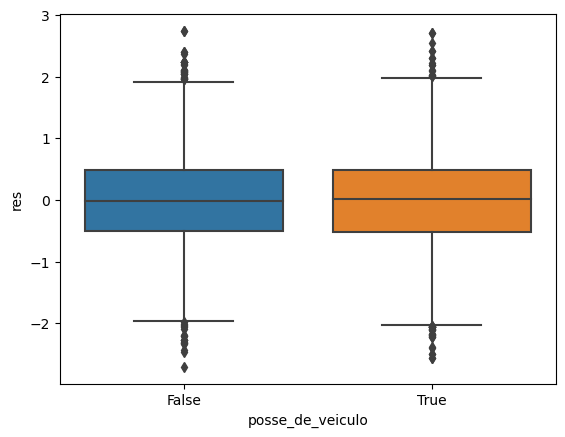

In [46]:
#5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.
sns.boxplot(x = 'posse_de_veiculo', y = 'res', data = df)

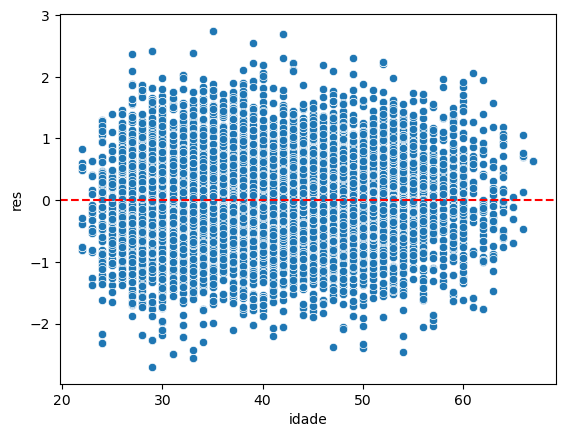

In [47]:
sns.scatterplot(x = 'idade', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

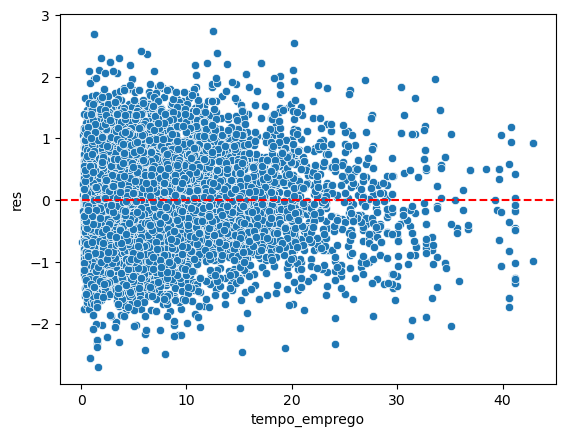

In [48]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sexo_F', ylabel='res'>

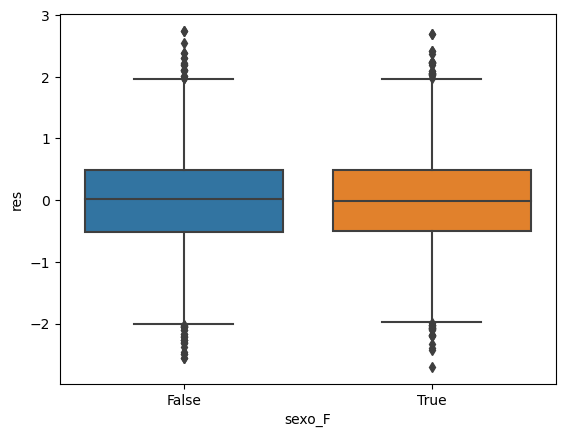

In [49]:
sns.boxplot(x = 'sexo_F', y = 'res', data = df)

<Axes: xlabel='sexo_M', ylabel='res'>

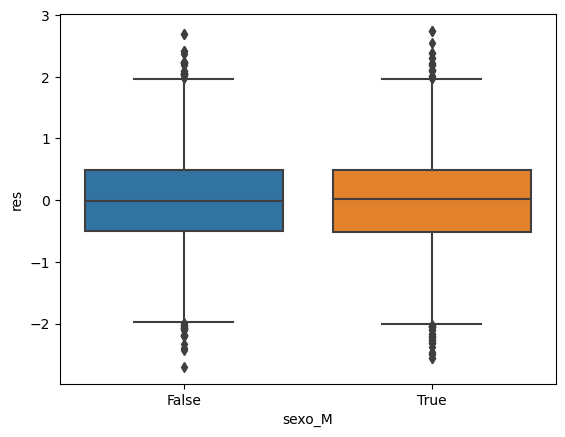

In [50]:
sns.boxplot(x = 'sexo_M', y = 'res', data = df)

<Axes: xlabel='tipo_renda_Empresário', ylabel='res'>

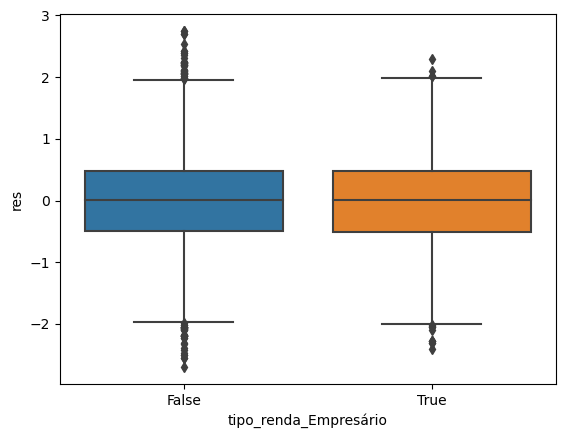

In [51]:
sns.boxplot(x = 'tipo_renda_Empresário', y = 'res', data = df)